In [ ]:
import numpy as np
import missingno as msno
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv("UDPLag.csv")
df

<ipython-input-4-df9c774d9054>:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("UDPLag.csv")


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,186059,172.16.0.5-192.168.50.1-58445-4463-17,172.16.0.5,58445,192.168.50.1,4463,17,2018-12-01 13:04:45.928673,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
1,135692,172.16.0.5-192.168.50.1-36908-9914-17,172.16.0.5,36908,192.168.50.1,9914,17,2018-12-01 13:04:45.928913,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
2,33822,172.16.0.5-192.168.50.1-41727-32361-17,172.16.0.5,41727,192.168.50.1,32361,17,2018-12-01 13:04:45.928915,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
3,24498,172.16.0.5-192.168.50.1-55447-5691-17,172.16.0.5,55447,192.168.50.1,5691,17,2018-12-01 13:04:45.929024,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
4,117372,172.16.0.5-192.168.50.1-58794-56335-17,172.16.0.5,58794,192.168.50.1,56335,17,2018-12-01 13:04:45.929096,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370600,350624,172.16.0.5-192.168.50.1-60490-14102-6,172.16.0.5,60490,192.168.50.1,14102,6,2018-12-01 13:30:30.740273,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
370601,336856,172.16.0.5-192.168.50.1-60491-58360-6,172.16.0.5,60491,192.168.50.1,58360,6,2018-12-01 13:30:30.740323,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
370602,115128,172.16.0.5-192.168.50.1-60492-2905-6,172.16.0.5,60492,192.168.50.1,2905,6,2018-12-01 13:30:30.740374,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag
370603,51370,172.16.0.5-192.168.50.1-60493-45714-6,172.16.0.5,60493,192.168.50.1,45714,6,2018-12-01 13:30:30.740424,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,UDP-lag


In [ ]:
# Mengubah nilai 'WebDDoS' menjadi 'UDP-lag' pada kolom 'Label'
df[' Label'] = df[' Label'].replace('WebDDoS', 'UDP-lag')

In [ ]:
# delete columns that are clearly not relevant
df.drop(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',' Destination IP', ' Destination Port',' Timestamp' ,'SimillarHTTP', ' Inbound'], axis=1, inplace=True)

# delete columns with the same value or negative value
df.drop([' Bwd PSH Flags', 'Init_Win_bytes_forward', ' Init_Win_bytes_backward'], axis=1, inplace=True)

In [ ]:
import numpy as np
#Label Encoding
df.loc[df[' Label'] == 'BENIGN', ' Label'] = 0
df.loc[df[' Label'] == 'UDP-lag', ' Label'] = 1
# Replace any remaining non-numeric values with NaN before converting to int
df[' Label'] = pd.to_numeric(df[' Label'], errors='coerce')
df[' Label'] = df[' Label'].astype(int, errors='ignore') # Use errors='ignore' to prevent the error from stopping execution if there is invalid data

In [ ]:
# delete rows with INF, NAN, negative values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace = True)
df = df[(df >= 0).all(axis=1)]

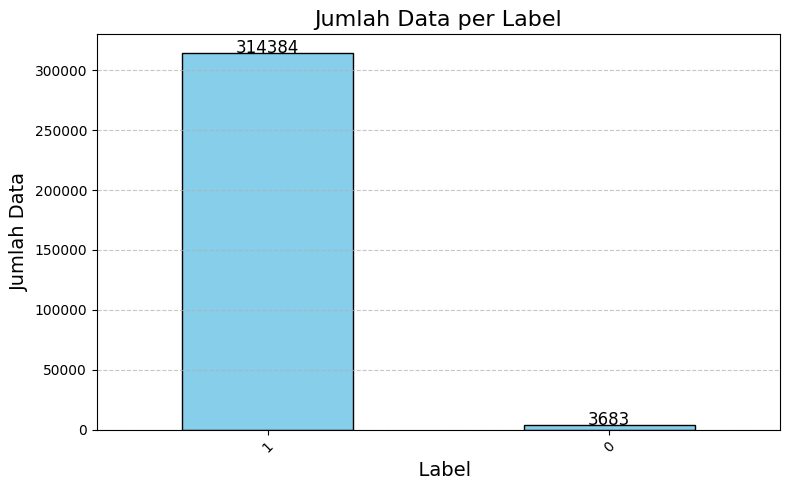

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Menghitung jumlah data per label pada kolom 'Label'
label_counts = df[' Label'].value_counts()

# Visualisasi menggunakan Bar Chart
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Data per Label', fontsize=16)
plt.xlabel('  Label', fontsize=14)
plt.ylabel('Jumlah Data', fontsize=14)
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Menambahkan grid pada sumbu y

# Menambahkan nilai di atas setiap bar
for i, count in enumerate(label_counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12)

plt.tight_layout()  # Menyesuaikan layout
plt.show()

In [ ]:
# Normalisasi Min-Max
scaler = MinMaxScaler()

# Menerapkan normalisasi Min-Max
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("DataFrame setelah normalisasi Min-Max:")
print(df_normalized)

DataFrame setelah normalisasi Min-Max:
         Protocol   Flow Duration   Total Fwd Packets  \
0        0.000000    9.987729e-01            0.033471   
1        0.352941    3.157334e-03            0.000118   
2        1.000000    9.007251e-04            0.000355   
3        1.000000    1.763917e-03            0.000591   
4        1.000000    8.256584e-03            0.002247   
...           ...             ...                 ...   
318062   0.352941    0.000000e+00            0.000118   
318063   0.352941    0.000000e+00            0.000118   
318064   0.352941    0.000000e+00            0.000118   
318065   0.352941    8.333334e-09            0.000118   
318066   0.352941    1.108333e-06            0.000118   

         Total Backward Packets  Total Length of Fwd Packets  \
0                      0.513064                     0.000000   
1                      0.007126                     0.002007   
2                      0.000000                     0.021225   
3                   

In [ ]:
# Definisikan x dan y
X = df_normalized.drop(' Label', axis=1)
Y = df_normalized[' Label']

In [ ]:
#%% Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeatures.fit(X,Y)
tdscores = pd.DataFrame(fit.scores_)
tdcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([tdcolumns,tdscores],axis=1)
featureScores.columns = ['Columns','Score']  # naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  # print 10 best features

                    Columns          Score
47           URG Flag Count  111625.157387
48           CWE Flag Count   46650.558152
10    Bwd Packet Length Max   45346.871036
53     Avg Bwd Segment Size   44657.052475
12   Bwd Packet Length Mean   44657.052475
30            Fwd PSH Flags   38945.253806
44           RST Flag Count   38945.253806
40        Packet Length Std   36838.044817
50            Down/Up Ratio   36632.341392
34        Bwd Header Length   30821.802750
13    Bwd Packet Length Std   30194.120050
9     Fwd Packet Length Std   27418.438836
11    Bwd Packet Length Min   23581.891551
25            Bwd IAT Total   23354.902998
3    Total Backward Packets   22525.668270
63      Subflow Bwd Packets   22525.668270
41   Packet Length Variance   22501.580730
46           ACK Flag Count   18677.279648
65         act_data_pkt_fwd   16641.662919
28              Bwd IAT Max   10738.114900


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [31 32 42 45 49 55 56 57 58 59 60] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Mengambil 20 fitur teratas berdasarkan skor
top_20_features = featureScores.nlargest(10, 'Score')['Columns'].tolist()

# Definisikan x berdasarkan 20 fitur teratas
X = df_normalized[top_20_features]

In [ ]:
# SPLIT THE DATA into TRAIN AND TEST data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE untuk menyeimbangkan kelas pada set pelatihan
smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

# Menampilkan distribusi kelas sebelum dan setelah SMOTE
print("Distribusi Kelas Sebelum SMOTE:")
# Convert Y_train to a Pandas Series to use value_counts()
print(pd.Series(Y_train).value_counts())

print("\nDistribusi Kelas Setelah SMOTE:")
# Convert Y_resampled to a Pandas Series to use value_counts()
print(pd.Series(Y_resampled).value_counts())

Distribusi Kelas Sebelum SMOTE:
 Label
1.0    251524
0.0      2929
Name: count, dtype: int64

Distribusi Kelas Setelah SMOTE:
 Label
1.0    251524
0.0    251524
Name: count, dtype: int64


In [ ]:
X_resampled

,URG Flag Count,CWE Flag Count,Bwd Packet Length Max,Avg Bwd Segment Size,Bwd Packet Length Mean,Fwd PSH Flags,RST Flag Count,Packet Length Std,Down/Up Ratio,Bwd Header Length
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
503043,0.0,0.0,0.020286,0.036473,0.036473,0.0,0.0,0.012372,0.083333,0.004737
503044,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.004737
503045,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.166667,0.004737
503046,0.0,0.0,0.082571,0.148459,0.148459,0.0,0.0,0.098977,0.083333,0.007362


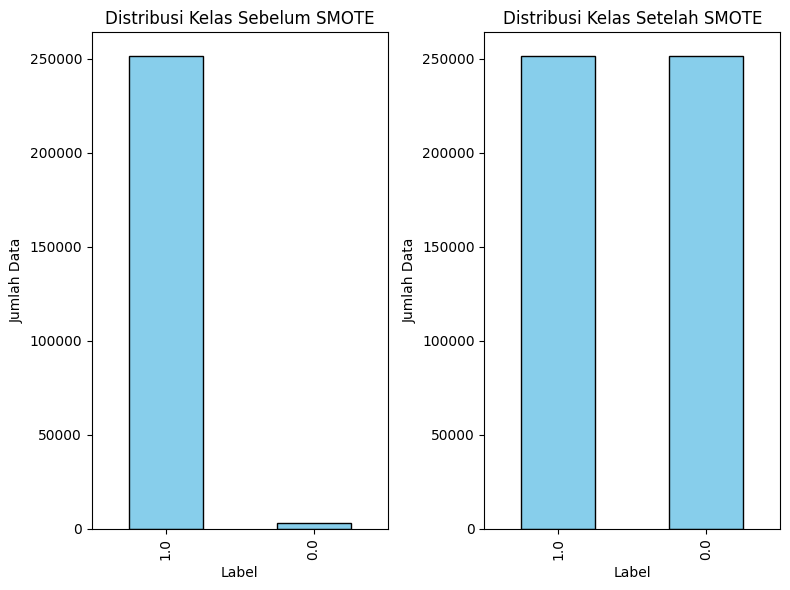

In [ ]:
# Visualisasi distribusi kelas sebelum dan sesudah SMOTE
import matplotlib.pyplot as plt

# Distribusi kelas sebelum SMOTE
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
pd.Series(Y_train).value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Kelas Sebelum SMOTE')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

# Distribusi kelas setelah SMOTE
plt.subplot(1, 2, 2)
pd.Series(Y_resampled).value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Kelas Setelah SMOTE')
plt.xlabel('Label')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()

In [ ]:
X

,URG Flag Count,CWE Flag Count,Bwd Packet Length Max,Avg Bwd Segment Size,Bwd Packet Length Mean,Fwd PSH Flags,RST Flag Count,Packet Length Std,Down/Up Ratio,Bwd Header Length
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,1.0,0.0,0.014857,0.017808,0.017808,1.0,1.0,0.018594,0.083333,0.011369
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.022811,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.023730,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.021673,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
318062,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
318063,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
318064,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
318065,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Latih model KNN dengan data yang sudah di-resample
knn_model.fit(X_resampled, Y_resampled)

# Prediksi pada data uji
Y_pred_knn = knn_model.predict(X_test)

In [ ]:
#%% Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn_model, X_resampled, Y_resampled, cv = 10)
print("\nCross-validation: %0.3f accuracy with a standard deviation of %0.3f\n" % (cv_scores.mean(), cv_scores.std()))


Cross-validation: 0.983 accuracy with a standard deviation of 0.023



In [ ]:
# Prediksi pada data uji
Y_pred = knn_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9996070047473826
Precision: 0.999872714833495
Recall: 0.9997295577473752
F1 Score: 0.9998011311659282
